# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('E:/Jn/smprojects/bankmarketing.csv')

# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:

# Check for missing values and data types
print(" Missing Values Check ")

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].to_markdown(numalign="left", stralign="left"))

if missing_values[missing_values > 0].empty:
    print("No standard missing values (NaN or Null) found.")

print("\n--------------------------")


print(" Data Types Check ")
df.info()
print("--------------------------")


print("\n Non-Standard Missing Value Count ")
for col in df.select_dtypes(include='object').columns:
    count_unknown = (df[col] == 'unknown').sum()
    if count_unknown > 0:
        print(f"'{col}': {count_unknown} occurrences")

print("--------------------------")



--- Missing Values Check ---
| 0   |
|-----|
No standard missing values (NaN or Null) found.

--------------------------
--- Data Types Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        4118

In [5]:

# Summary statistics

print("\n Summary Statistics for Numerical Columns")

print(df.describe().T.to_markdown(numalign="left", stralign="left"))
print("--------------------------")

print("\n Summary Statistics for Categorical Columns ")
# Generates descriptive statistics (count, unique, top, freq) for object (categorical) columns.
print(df.describe(include='object').T.to_markdown(numalign="left", stralign="left"))
print("--------------------------")



 Summary Statistics for Numerical Columns
|                | count   | mean      | std      | min    | 25%    | 50%    | 75%    | max    |
|:---------------|:--------|:----------|:---------|:-------|:-------|:-------|:-------|:-------|
| age            | 41188   | 40.0241   | 10.4212  | 17     | 32     | 38     | 47     | 98     |
| duration       | 41188   | 258.285   | 259.279  | 0      | 102    | 180    | 319    | 4918   |
| campaign       | 41188   | 2.56759   | 2.77001  | 1      | 1      | 2      | 3      | 56     |
| pdays          | 41188   | 962.475   | 186.911  | 0      | 999    | 999    | 999    | 999    |
| previous       | 41188   | 0.172963  | 0.494901 | 0      | 0      | 0      | 0      | 7      |
| emp.var.rate   | 41188   | 0.0818855 | 1.57096  | -3.4   | -1.8   | 1.1    | 1.4    | 1.4    |
| cons.price.idx | 41188   | 93.5757   | 0.57884  | 92.201 | 93.075 | 93.749 | 93.994 | 94.767 |
| cons.conf.idx  | 41188   | -40.5026  | 4.6282   | -50.8  | -42.7  | -41.8  | -36.4

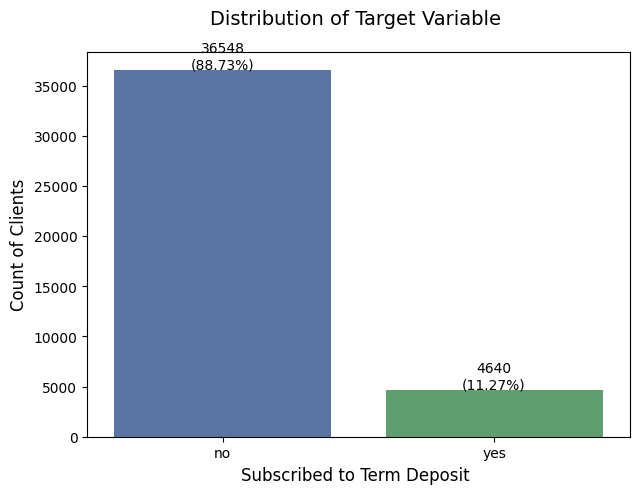

In [35]:

import seaborn as sns
import matplotlib.pyplot as plt




target_counts = df['y'].value_counts()
target_percentages = df['y'].value_counts(normalize=True) * 100


custom_palette = {"no": "#4c72b0", "yes": "#55a868"} 


plt.figure(figsize=(7, 5))
ax = sns.countplot(
    x='y', 
    data=df, 
    palette=custom_palette, 
    order=target_counts.index,
    hue='y',         
    legend=False      
)
plt.title('Distribution of Target Variable ', fontsize=14,y=1.05 )
plt.xlabel('Subscribed to Term Deposit ', fontsize=12)
plt.ylabel('Count of Clients', fontsize=12)


for i, p in enumerate(ax.patches):
    
    label = ax.get_xticklabels()[i].get_text()
    
   
    count = target_counts.iloc[i]
    percentage = target_percentages.iloc[i]


    text = f'{count}\n({percentage:.2f}%)'
    
    # Place text above the bar
    ax.annotate(
        text, 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points', 
        fontsize=10
    )

plt.show()



    

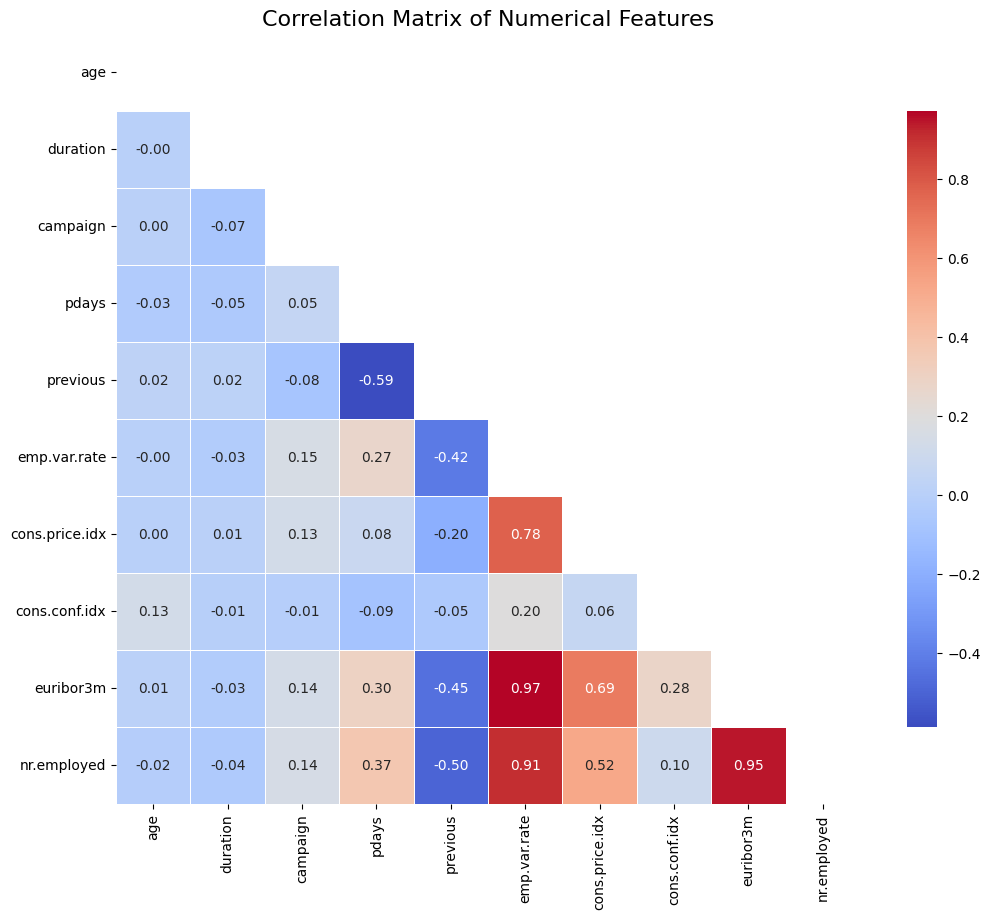

In [31]:
import numpy as np

correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

mask = np.triu(correlation_matrix)

plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_matrix, 
    annot=True,              
    fmt=".2f",              
    cmap='coolwarm',        
    mask=mask,               
    linewidths=.5,           
    cbar_kws={"shrink": .8}  
)

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()






## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
